In [1]:
import os
import time
import torch
import math
import torchvision
from torchvision import transforms as transforms
from torch import nn
from torch.nn import functional as F
from math import cos,pi

import matplotlib.pyplot as plt
import numpy as np
import random

torch.cuda.empty_cache()

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.manual_seed(17)

class HaS(object): 
#     def __init__(self):
        
    def __call__(self, img):
        # get width and height of the image
        img_= np.array(img).copy()
        s = img_.shape
        wd = s[0]
        ht = s[1]

        # possible grid size, 0 means no hiding
        grid_size=3

        # hiding probability
        hide_prob = 0.1
 
        # randomly choose one grid size
#         grid_size= grid_sizes[random.randint(0,len(grid_sizes)-1)]

        # hide the patches
        if(grid_size>0):
             for x in range(0,wd,grid_size):
                 for y in range(0,ht,grid_size):
                     x_end = min(wd, x+grid_size)  
                     y_end = min(ht, y+grid_size)
                     if(random.random() <=  hide_prob):
                           img_[x:x_end,y:y_end,:]=0

        return img_
    
torch.manual_seed(17)

        
# class HideEdge(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img):
#         # get width and height of the image
#         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[0]
#         ht = s[1]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[x_end:,y_end:,:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:hide_size,:hide_size,:]=0
# #         img_[x_end:,:,:]=0
# #         img_[:,y_end:,:]=0
# #         img_[:hide_size,:,:]=0
# #         img_[:,:hide_size,:]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_

   
# class Hide_after_Norm(object): 
#     def __init__(self,hide_size):
#         self.hide_size=hide_size
        
#     def __call__(self, img_):
#         # get width and height of the image
# #         img_= np.array(img).copy()
#         s = img_.shape
#         wd = s[1]
#         ht = s[2]

#         hide_size=self.hide_size
        
# #         img_[:,:,:] = img()
   
#         x_end = wd - hide_size 
#         y_end = ht - hide_size
        
#         x_end = wd - hide_size 
#         y_end = ht - hide_size

#         img_[:,x_end:,y_end:]=0
# #         img_[x_end:,:hide_size,:]=0
# #         img_[:hide_size,y_end:,:]=0
#         img_[:,:hide_size,:hide_size]=0
# #         print(img_[x_end,y_end,:])
# #         print(img_[hide_size,hide_size,:])
# #         print(x_end,y_end,hide_size)
        
# #         mean = img_[hide_size:x_end-1,hide_size:y_end,:].mean()
# #         std = img_[hide_size:x_end-1,hide_size:y_end,:].std()
# #         print(mean, std)
# #         img_[hide_size:x_end-1,hide_size:y_end,:] = (img_[hide_size:x_end-1,hide_size:y_end,:] - mean) / std
# #         print(img_[hide_size:x_end-1,hide_size:y_end,:])
        
#         return img_
    
    

# # torch.cuda.manual_seed(17) # for GPU
# aug_train = transforms.Compose([
#     transforms.RandomHorizontalFlip(), # 水平翻转
# #     torchvision.transforms.CenterCrop(26),
# #     HideEdge(),
#     torchvision.transforms.RandomRotation(15),
# #     torchvision.transforms.CenterCrop(28),
#     # transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5), # color aug
# #     transforms.RandomCrop(32, padding=4), # 裁剪
#     # transforms.RandomResizedCrop((32,32),scale=(0.1,1),ratio=(0.5,2))
# #     hide_patch(),
# #     HaS(),
# #     HideEdge(2),
#     transforms.ToTensor(),
# #     Norm(2),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)),# normalization
#     Hide_after_Norm(2)
#     ])

# aug_test = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.4649, 0.4553, 0.4214), (0.2271, 0.2234, 0.2208)), # normalization
#     Hide_after_Norm(2)
#     ])

# trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)
# # testdata = torchvision.datasets.CIFAR10('./CIFAR10',train=False,download=True,transform=transforms.ToTensor())
# # print(len(trainingdata),len(testdata))

In [4]:
torch.manual_seed(17)
torch.cuda.manual_seed_all(17)

aug_train = transforms.Compose([
    transforms.RandomCrop(32,padding=4,padding_mode='reflect'),
    transforms.RandomHorizontalFlip(), # 水平翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

aug_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4244, 0.4146, 0.3836), (0.2539, 0.2491, 0.2420)) # normalization
    ])

trainingdata = torchvision.datasets.CIFAR10('./CIFAR10',train=True,download=True,transform=aug_train)

Files already downloaded and verified


In [5]:
def get_mean_and_std(dataset):
  '''Compute the mean and std value of dataset.'''
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
  mean = torch.zeros(3)
  std = torch.zeros(3)
  print('==> Computing mean and std..')
  for inputs, targets in dataloader:
      for i in range(3):
          mean[i] += inputs[:,i,:,:].mean()
          std[i] += inputs[:,i,:,:].std()
  mean.div_(len(dataset))
  std.div_(len(dataset))
  return mean, std

def load_data(is_train,aug,batch_size):
  dataset = torchvision.datasets.CIFAR10('./CIFAR10',train=is_train,download=True,transform=aug)
#   mean, std = get_mean_and_std(dataset)
#   print(mean, std)
  dataloader = torch.utils.data.DataLoader(dataset,batch_size=batch_size,shuffle=is_train)
  return dataloader

batch_size = 128 # param
trainDataLoader = load_data(is_train=True,aug=aug_train,batch_size=batch_size)
testDataLoader = load_data(is_train=False,aug=aug_test,batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 32, 32]) 6
[[[-0.9147032  -0.38956204  0.0274618  ...  0.01201648  0.18191507
    0.15102442]
  [-0.32778072 -0.03431951  0.10468844 ... -0.21966343  0.1973604
    0.2591417 ]
  [-0.09610081  0.29003236  0.24369638 ... -0.6366873  -0.51312464
   -0.32778072]
  ...
  [ 1.0931895   1.2321974   1.448432   ...  0.22825105  0.66072035
    1.6646665 ]
  [ 1.2013068   1.3248694   1.3866507  ... -0.38956204 -0.17332745
    1.1704161 ]
  [ 1.3866507   1.2785335   1.1549708  ... -0.8529219  -0.8065859
    0.7997283 ]]

 [[-1.2393323  -0.8772444  -0.53089947 ... -0.5151565  -0.3419841
   -0.3419841 ]
  [-0.8142726  -0.6725861  -0.5623854  ... -0.68832904 -0.32624117
   -0.29475525]
  [-0.6411001  -0.42069885 -0.45218474 ... -1.003188   -0.9244732
   -0.76704377]
  ...
  [ 0.57110703  0.6813077   0.9804237  ... -0.21604052  0.19327614
    1.2323109 ]
  [ 0.6025929   0.74427944  0.8229942  ... -0.83001554 -0.68832904
    0.6655647 ]
  [ 0.87022305  0.8072512   0.6340788  ... -1.12913

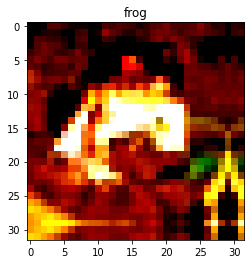

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

image,label = trainingdata[0]
image_= np.array(image).copy()
print(image.shape, label)
print(image_)

%matplotlib inline
plt.imshow(image.numpy().transpose(1,2,0))
plt.title(str(classes[label]))
plt.show()

In [7]:
# trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=batch_size,shuffle=True)
# testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=batch_size,shuffle=False)

# images, labels = iter(trainDataLoader).next()
# plt.figure(figsize=(17,8))
# for index in np.arange(0,5):
#   plt.subplot(1,5,index+1)
#   plt.imshow(images[index].numpy().transpose(1,2,0))
#   plt.title(str(classes[labels[index]]))

def get_mean_and_std(dataset):
  '''Compute the mean and std value of dataset.'''
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
  mean = torch.zeros(3)
  std = torch.zeros(3)
  print('==> Computing mean and std..')
  for inputs, targets in dataloader:
      for i in range(3):
          mean[i] += inputs[:,i,:,:].mean()
          std[i] += inputs[:,i,:,:].std()
  mean.div_(len(dataset))
  std.div_(len(dataset))
  return mean, std


In [8]:
class BasicBlock(nn.Module):

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out



class ResNet(nn.Module):
    def __init__(self, in_planes, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = in_planes

        self.conv1 = nn.Conv2d(3, self.in_planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(self.in_planes)
        self.layer1 = self._make_layer(block, in_planes, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, in_planes*2, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, in_planes*4, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, in_planes*8, num_blocks[3], stride=2)
#         self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
#         self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
#         self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
#         self.layer4 = self._make_layer(block, self.in_planes*8, num_blocks[3], stride=2)
        self.linear = nn.Linear(1024, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
#         print(x.shape)
        out = F.relu(self.bn1(self.conv1(x)))
#         print(out.shape)
        out = self.layer1(out)
#         print(out.shape)
        out = self.layer2(out)
#         print(out.shape)
        out = self.layer3(out)
#         print(out.shape)
#         out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
#         print(out.shape)
        out = out.view(out.size(0), -1)
#         print(out.shape)
        out = self.linear(out)
        return out
    
    def init_weights(self):
        for m in self.modules():
            if isinstance(m,nn.Conv2d):
                nn.init.kaiming_normal_(m.weight,mode='fan_out',nonlinearity='relu') # weight initialization
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.BatchNorm2d):
                nn.init.constant_(m.weight,1)
                nn.init.constant_(m.bias,0)
            elif isinstance(m,nn.Linear):
                nn.init.normal_(m.weight,std=1e-3)
                if m.bias is not None:
                    nn.init.constant_(m.bias,0)

def project1_model():
#     return ResNet(BasicBlock, [2, 2, 2, 2])
#     return ResNet(BasicBlock, [2, 2, 2])
    return ResNet(64, BasicBlock, [3, 3, 3])

# model1 = nn.Sequential(project1_model(), nn.AdaptiveAvgPool2d((1,1)), nn.Flatten(), nn.Linear(512, 10)).cuda()
model1 = project1_model().cuda()
model1.init_weights()

In [9]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    # torch.numel() returns number of elements in a tensor

print(count_parameters(model1))

4335434


In [10]:
def adjust_learning_rate(optimizer, current_epoch,max_epoch,lr_min=0,lr_max=0.1,warmup=True):
    warmup_epoch = 10 if warmup else 0
    if current_epoch < warmup_epoch:
        lr = lr_max * current_epoch / warmup_epoch
    else:
        lr = lr_min + (lr_max-lr_min)*(1 + cos(pi * (current_epoch - warmup_epoch) / (max_epoch - warmup_epoch))) / 2
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [11]:
# X = torch.rand(size=(1, 3, 32, 32)).cuda()
# for layer in model1:
#   X = layer(X)
#   print(layer.__class__.__name__,'output shape:\t', X.shape)

In [ ]:
num_epochs = 5000 # param
epoch_start = 0
# path = 'adam_rotate_center_crop1.pt'
# path = 'block_3.pt'
path = 'batch_128_lr_0.1_no_crop_decay_avg_4.pt'

train_loss_history = []
test_loss_history = []
test_accuracy_history = []
train_accuracy_history = []

Loss = torch.nn.CrossEntropyLoss()
lr = 0.1 # param
lr_min=0.001
# optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=0.9,weight_decay=5e-4) # changable optimizer
# optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=0.9) # changable optimizer
# optimizer = torch.optim.Adam(model1.parameters(),lr=lr, betas=(0.9,0.999), eps=1e-08, amsgrad=False) # changable optimizer
momentum = 0.9
nesterov = True
optimizer = torch.optim.SGD(model1.parameters(),lr=lr,momentum=momentum,nesterov=nesterov)

# torch.cuda.empty_cache()

if os.path.exists(path):
  checkpoint = torch.load(path)
  print('Read model from checkpoint')
  model1.cuda().load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  epoch_start = checkpoint['epoch']
  Loss = checkpoint['Loss']
  train_loss_history = checkpoint['train_loss_history']
  test_loss_history = checkpoint['test_loss_history']
  test_accuracy_history = checkpoint['test_accuracy_history']
  train_accuracy_history = checkpoint['train_accuracy_history']
  print('Restart from epoch',epoch_start)
    

for epoch in range(epoch_start+1, num_epochs + 1):
  timestart = time.time()

  train_loss = 0.0
  test_loss = 0.0
  test_accuracy = 0.0
  train_accuracy = 0.0

  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad()
    predicted_output = model1.cuda()(images)
    fit = Loss(predicted_output,labels)
    fit.backward()
    adjust_learning_rate(optimizer=optimizer,current_epoch=epoch,max_epoch=num_epochs,lr_min=lr_min,lr_max=lr,warmup=True)
    optimizer.step()
    train_loss += fit.item()
    train_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()

  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = model1.cuda()(images)
      fit = Loss(predicted_output,labels)
      test_loss += fit.item()
      test_accuracy += (torch.eq(torch.max(predicted_output,1)[1],labels).sum()/len(labels)*100).data.cpu().numpy()


  train_loss = train_loss/len(trainDataLoader)
  test_loss = test_loss/len(testDataLoader)
  test_accu = test_accuracy/len(testDataLoader)
  train_accu = train_accuracy/len(trainDataLoader)
  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)
  test_accuracy_history.append(test_accu)
  train_accuracy_history.append(train_accu)
  print('Epoch %s, Train loss %s, Test loss %s, Train accuracy %s, Test accuracy %s, Cost %s s'%(epoch,
                                                                                                   train_loss,test_loss,
                                                                                                   train_accu,test_accu,
                                                                                                   time.time()-timestart))
  
  if epoch % 5 == 0 and epoch != 0:
    torch.save({'epoch':epoch,
          'model_state_dict':model1.cuda().state_dict(),
          'optimizer_state_dict':optimizer.state_dict(),
          'Loss':Loss,
          'train_loss_history':train_loss_history,
          'test_loss_history':test_loss_history,
          'test_accuracy_history':test_accuracy_history,
          'train_accuracy_history':train_accuracy_history},path)
    print('Model saved in epoch %s'%(epoch))

Read model from checkpoint
Restart from epoch 1700
Epoch 1701, Train loss 7.739918532986174e-06, Test loss 0.5536197941703133, Train accuracy 100.0, Test accuracy 93.92800632911393, Cost 78.0152907371521 s
Epoch 1702, Train loss 1.3336263703112397e-05, Test loss 0.5591882418228101, Train accuracy 100.0, Test accuracy 93.9181170886076, Cost 78.06867241859436 s
Epoch 1703, Train loss 6.724497964798562e-06, Test loss 0.5602872442406944, Train accuracy 100.0, Test accuracy 93.92800632911393, Cost 77.89485025405884 s
Epoch 1704, Train loss 6.018022605337427e-05, Test loss 0.5525626578851591, Train accuracy 99.99800191815856, Test accuracy 94.07634493670886, Cost 78.1093270778656 s
Epoch 1705, Train loss 1.1203940107878142e-05, Test loss 0.5506820327873472, Train accuracy 100.0, Test accuracy 94.1554588607595, Cost 77.92202949523926 s
Model saved in epoch 1705
Epoch 1706, Train loss 9.563755504678156e-06, Test loss 0.5496814387697208, Train accuracy 100.0, Test accuracy 94.06645569620254, Co

Epoch 1752, Train loss 1.2758368791170845e-06, Test loss 0.5436997204264508, Train accuracy 100.0, Test accuracy 94.24446202531645, Cost 78.07162857055664 s
Epoch 1753, Train loss 4.337688004574066e-06, Test loss 0.5434280301951155, Train accuracy 100.0, Test accuracy 94.2246835443038, Cost 77.88445854187012 s
Epoch 1754, Train loss 3.6460937910300173e-06, Test loss 0.5437971920340876, Train accuracy 100.0, Test accuracy 94.24446202531645, Cost 78.25361728668213 s
Epoch 1755, Train loss 6.5946160247479835e-06, Test loss 0.541373585409756, Train accuracy 100.0, Test accuracy 94.21479430379746, Cost 77.86107921600342 s
Model saved in epoch 1755
Epoch 1756, Train loss 6.887541550432411e-06, Test loss 0.5400297931289371, Train accuracy 100.0, Test accuracy 94.16534810126582, Cost 78.0264413356781 s
Epoch 1757, Train loss 6.155738196510471e-06, Test loss 0.540657399858855, Train accuracy 100.0, Test accuracy 94.2246835443038, Cost 77.95964884757996 s
Epoch 1758, Train loss 1.110945979558869

Epoch 1803, Train loss 1.8425587738018615e-06, Test loss 0.5450450851570202, Train accuracy 100.0, Test accuracy 94.14556962025317, Cost 78.33058762550354 s
Epoch 1804, Train loss 1.7425251474145584e-06, Test loss 0.5452761610474768, Train accuracy 100.0, Test accuracy 94.1257911392405, Cost 78.18420457839966 s
Epoch 1805, Train loss 2.116350095265938e-06, Test loss 0.5451937063208109, Train accuracy 100.0, Test accuracy 94.13568037974683, Cost 78.30203747749329 s
Model saved in epoch 1805
Epoch 1806, Train loss 1.6107758345499142e-06, Test loss 0.5452574397189708, Train accuracy 100.0, Test accuracy 94.1257911392405, Cost 78.23308420181274 s
Epoch 1807, Train loss 1.507145346088158e-06, Test loss 0.5452217609633373, Train accuracy 100.0, Test accuracy 94.14556962025317, Cost 78.31767797470093 s
Epoch 1808, Train loss 1.6032288007436892e-06, Test loss 0.5452018052905421, Train accuracy 100.0, Test accuracy 94.13568037974683, Cost 78.0980703830719 s
Epoch 1809, Train loss 1.666174785942

Epoch 1854, Train loss 1.124751267787369e-06, Test loss 0.5466563637498059, Train accuracy 100.0, Test accuracy 94.07634493670886, Cost 78.73767638206482 s
Epoch 1855, Train loss 6.918895050770757e-06, Test loss 0.547728958292098, Train accuracy 100.0, Test accuracy 94.06645569620254, Cost 78.46906614303589 s
Model saved in epoch 1855
Epoch 1856, Train loss 1.0323683147011172e-06, Test loss 0.5478288271947752, Train accuracy 100.0, Test accuracy 94.06645569620254, Cost 78.48480033874512 s
Epoch 1857, Train loss 1.403638186168438e-06, Test loss 0.5478294999161853, Train accuracy 100.0, Test accuracy 94.0565664556962, Cost 78.47142362594604 s
Epoch 1858, Train loss 1.2911547592252097e-06, Test loss 0.5478529068110864, Train accuracy 100.0, Test accuracy 94.04667721518987, Cost 78.5321912765503 s
Epoch 1859, Train loss 1.941425158391489e-06, Test loss 0.5478270795149139, Train accuracy 100.0, Test accuracy 94.06645569620254, Cost 78.29547047615051 s
Epoch 1860, Train loss 2.04187181510285

Epoch 1905, Train loss 3.0281689816719094e-06, Test loss 0.548752839995336, Train accuracy 100.0, Test accuracy 94.09612341772151, Cost 78.21201586723328 s
Model saved in epoch 1905
Epoch 1906, Train loss 1.3149996281387762e-06, Test loss 0.5487113283782066, Train accuracy 100.0, Test accuracy 94.08623417721519, Cost 78.41884636878967 s
Epoch 1907, Train loss 1.444863871578482e-06, Test loss 0.5485094859253002, Train accuracy 100.0, Test accuracy 94.08623417721519, Cost 78.30062937736511 s
Epoch 1908, Train loss 1.2799328960111746e-06, Test loss 0.5486062378445759, Train accuracy 100.0, Test accuracy 94.08623417721519, Cost 78.61692810058594 s
Epoch 1909, Train loss 1.0419955583892139e-06, Test loss 0.5485654550639889, Train accuracy 100.0, Test accuracy 94.08623417721519, Cost 78.17981815338135 s
Epoch 1910, Train loss 1.5084620449852725e-06, Test loss 0.5486267457091356, Train accuracy 100.0, Test accuracy 94.08623417721519, Cost 78.90952706336975 s
Model saved in epoch 1910
Epoch 19

Epoch 1956, Train loss 1.565587440223821e-06, Test loss 0.5502416993243785, Train accuracy 100.0, Test accuracy 94.06645569620254, Cost 78.55729532241821 s
Epoch 1957, Train loss 4.965223140304328e-06, Test loss 0.5497382535964628, Train accuracy 100.0, Test accuracy 94.07634493670886, Cost 78.21040487289429 s
Epoch 1958, Train loss 1.3476837766551546e-06, Test loss 0.5497714499884014, Train accuracy 100.0, Test accuracy 94.08623417721519, Cost 78.70480108261108 s
Epoch 1959, Train loss 1.1781954831849984e-06, Test loss 0.5497441723754134, Train accuracy 100.0, Test accuracy 94.07634493670886, Cost 78.49419212341309 s
Epoch 1960, Train loss 1.0112357309873393e-06, Test loss 0.5496705683726298, Train accuracy 100.0, Test accuracy 94.09612341772151, Cost 78.51669669151306 s
Model saved in epoch 1960
Epoch 1961, Train loss 8.711927377026529e-07, Test loss 0.5496483715840533, Train accuracy 100.0, Test accuracy 94.10601265822785, Cost 78.31619191169739 s
Epoch 1962, Train loss 2.7803516215

Epoch 2007, Train loss 8.826951857884499e-07, Test loss 0.5461609067418908, Train accuracy 100.0, Test accuracy 94.20490506329114, Cost 78.15830826759338 s
Epoch 2008, Train loss 2.4396283460688414e-06, Test loss 0.5462648267798786, Train accuracy 100.0, Test accuracy 94.18512658227849, Cost 77.99465417861938 s
Epoch 2009, Train loss 1.37744163821184e-06, Test loss 0.5462305008233348, Train accuracy 100.0, Test accuracy 94.17523734177215, Cost 78.1947865486145 s
Epoch 2010, Train loss 1.8306943656512738e-06, Test loss 0.5462284142835231, Train accuracy 100.0, Test accuracy 94.10601265822785, Cost 78.00477623939514 s
Model saved in epoch 2010
Epoch 2011, Train loss 1.3198043144978354e-06, Test loss 0.5464053784933272, Train accuracy 100.0, Test accuracy 94.10601265822785, Cost 78.2488694190979 s
Epoch 2012, Train loss 1.540697660490407e-06, Test loss 0.5464659701042538, Train accuracy 100.0, Test accuracy 94.10601265822785, Cost 77.88772010803223 s
Epoch 2013, Train loss 3.9831900313251

Epoch 2058, Train loss 1.6988232561073233e-06, Test loss 0.5472837768589394, Train accuracy 100.0, Test accuracy 94.1257911392405, Cost 77.95064997673035 s
Epoch 2059, Train loss 9.342562931717147e-07, Test loss 0.547283266447013, Train accuracy 100.0, Test accuracy 94.1257911392405, Cost 78.14100885391235 s
Epoch 2060, Train loss 1.1473894194513668e-06, Test loss 0.5472265978968596, Train accuracy 100.0, Test accuracy 94.1257911392405, Cost 77.79167413711548 s
Model saved in epoch 2060
Epoch 2061, Train loss 1.550989643170999e-05, Test loss 0.5462115330598022, Train accuracy 100.0, Test accuracy 94.17523734177215, Cost 78.08250522613525 s
Epoch 2062, Train loss 9.92286600850356e-07, Test loss 0.5463070197007324, Train accuracy 100.0, Test accuracy 94.18512658227849, Cost 77.8727171421051 s
Epoch 2063, Train loss 1.6673836627972085e-06, Test loss 0.5461056592720973, Train accuracy 100.0, Test accuracy 94.18512658227849, Cost 77.91244626045227 s
Epoch 2064, Train loss 1.4794806225375732

Epoch 2109, Train loss 1.0090614557184165e-06, Test loss 0.5493203524170043, Train accuracy 100.0, Test accuracy 94.1554588607595, Cost 77.93467283248901 s
Epoch 2110, Train loss 8.336099304040218e-07, Test loss 0.5492552897975415, Train accuracy 100.0, Test accuracy 94.16534810126582, Cost 78.03288054466248 s
Model saved in epoch 2110
Epoch 2111, Train loss 1.6130617743488324e-06, Test loss 0.5490193612213377, Train accuracy 100.0, Test accuracy 94.16534810126582, Cost 77.85948991775513 s
Epoch 2112, Train loss 8.152548710143082e-07, Test loss 0.5489767461637908, Train accuracy 100.0, Test accuracy 94.16534810126582, Cost 78.04604196548462 s
Epoch 2113, Train loss 7.115928340633828e-07, Test loss 0.5489977885839306, Train accuracy 100.0, Test accuracy 94.17523734177215, Cost 77.6912214756012 s
Epoch 2114, Train loss 7.690096940976795e-07, Test loss 0.5490369294074517, Train accuracy 100.0, Test accuracy 94.16534810126582, Cost 78.05870962142944 s
Epoch 2115, Train loss 5.9229286613347

Epoch 2160, Train loss 6.589107047867313e-07, Test loss 0.5497284982400604, Train accuracy 100.0, Test accuracy 94.17523734177215, Cost 78.45098185539246 s
Model saved in epoch 2160
Epoch 2161, Train loss 1.2584826481990458e-06, Test loss 0.5495889178371127, Train accuracy 100.0, Test accuracy 94.19501582278481, Cost 78.44504356384277 s
Epoch 2162, Train loss 1.238674157274502e-06, Test loss 0.5496304102147682, Train accuracy 100.0, Test accuracy 94.17523734177215, Cost 78.18388772010803 s
Epoch 2163, Train loss 8.26052733044365e-07, Test loss 0.5496870060510273, Train accuracy 100.0, Test accuracy 94.16534810126582, Cost 78.51726865768433 s
Epoch 2164, Train loss 7.201832892450535e-07, Test loss 0.5496597239111043, Train accuracy 100.0, Test accuracy 94.17523734177215, Cost 78.53054666519165 s
Epoch 2165, Train loss 5.981928808894275e-07, Test loss 0.5496677609184121, Train accuracy 100.0, Test accuracy 94.18512658227849, Cost 78.53086233139038 s
Model saved in epoch 2165
Epoch 2166, 

Epoch 2211, Train loss 1.5930434759797817e-06, Test loss 0.5497106282582765, Train accuracy 100.0, Test accuracy 94.0565664556962, Cost 78.72071862220764 s
Epoch 2212, Train loss 8.601732817006661e-07, Test loss 0.5497675216462039, Train accuracy 100.0, Test accuracy 94.06645569620254, Cost 78.49431228637695 s
Epoch 2213, Train loss 9.464299956907656e-07, Test loss 0.549738815219342, Train accuracy 100.0, Test accuracy 94.0565664556962, Cost 78.65479350090027 s


In [ ]:
num_epochs = 611
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(range(num_epochs),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(num_epochs),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(num_epochs),train_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
# plt.plot(range(num_epochs),test_accuracy_history,'-',linewidth=3,label='Test accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [ ]:
print('Accuracy:',sum(test_accuracy_history[-5:])/5)